<h1>1. Data Exploration</h1>

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [50]:
df = pd.read_csv("student_scores_dataset.csv")
df

,Study Hours,Exam Scores
0,3.7,87.9
1,9.5,143.6
2,7.3,123.7
3,6.0,99.9
4,1.6,64.5
...,...,...
95,4.9,95.3
96,5.2,101.9
97,4.3,94.5
98,0.3,53.9


In [51]:
df = pd.DataFrame(df)
df

,Study Hours,Exam Scores
0,3.7,87.9
1,9.5,143.6
2,7.3,123.7
3,6.0,99.9
4,1.6,64.5
...,...,...
95,4.9,95.3
96,5.2,101.9
97,4.3,94.5
98,0.3,53.9


In [52]:
# df.dropna()

In [53]:
df

,Study Hours,Exam Scores
0,3.7,87.9
1,9.5,143.6
2,7.3,123.7
3,6.0,99.9
4,1.6,64.5
...,...,...
95,4.9,95.3
96,5.2,101.9
97,4.3,94.5
98,0.3,53.9


In [54]:
#The features are the study hours
#The target are the Exam Scores

In [55]:
x = np.array(df["Study Hours"]).reshape(-1,1)
# x= df["Study Hours"]
# x

In [56]:
pd.isnull(x).sum()

0

In [57]:
y = np.array(df["Exam Scores"])
# y

In [58]:
pd.isnull(y).sum()

0

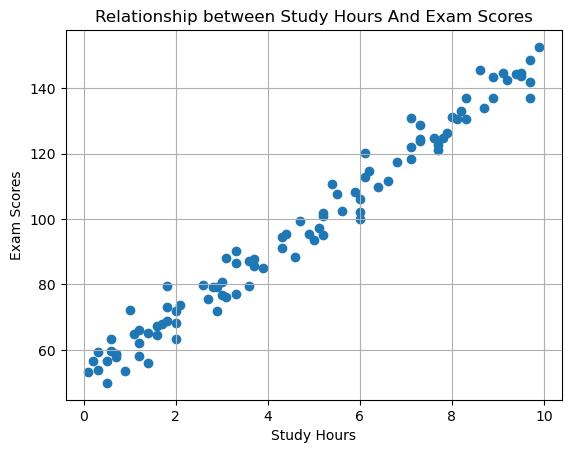

In [59]:
plt.xlabel("Study Hours")
plt.ylabel("Exam Scores")
plt.title("Relationship between Study Hours And Exam Scores")
plt.grid(True)
plt.scatter(x,y)


<h1>2. Data Preprocessing</H1>

In [60]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


In [61]:
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 
model = LinearRegression().fit(x_train, y_train)
model


LinearRegression()

In [64]:
y_pred = model.predict(x_test)
y_pred

array([ 70.80220907, 122.3764748 , 122.3764748 , 140.86536251,
       122.3764748 , 105.83378579,  80.5332026 , 131.13436898,
       109.7261832 ,  99.02209031, 137.94606445, 125.29577286,
        86.37179872,  71.77530842, 135.99986574, 110.69928256,
        79.56010325,  96.10279225, 143.78466057, 109.7261832 ])

In [65]:

from sklearn.metrics import accuracy_score, mean_absolute_error,mean_squared_error,r2_score, accuracy_score

In [66]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2_sc = r2_score(y_test, y_pred)
accuracy = accuracy_score(y_test,y_pred)

ValueError: continuous is not supported

In [37]:
print(f"mean_absolute_error: {mae}")
print(f"mean_squared_error: {mse}")
print(f"r2_score: {r2_sc}")
print(f"Accuracy Score: {accuracy})

mean_absolute_error: 3.1294023291165525
mean_squared_error: 16.538938986655605
r2_score: 0.971441676611226


In [47]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train_scaled)
x_test_poly = poly.transform(x_test_scaled)
poly_pred = model.predict(x_test_scaled)

In [48]:
mae = mean_absolute_error(y_test,poly_pred)
mse = mean_squared_error(y_test,poly_pred)
r2_sc = r2_score(y_test,poly_pred)
print(f"mean_absolute_error: {mae}")
print(f"mean_squared_error: {mse}")
print(f"r2_score: {r2_sc}")

mean_absolute_error: 52.89471144237483
mean_squared_error: 3074.3848710682446
r2_score: -4.308640260440032
